In [1]:
import pandas as pd

#Reads the dataset column of the different types of wine.
types = pd.read_csv("../project/wine.csv", usecols = ["variety"])

#Reads the dataset column of the different types of wine.
description = pd.read_csv("../project/wine.csv", usecols = ["description"])

wine_indices = []

#For loop to create a list of all the wines with their indices.
for i in range(types.shape[0]):
    
    wine = types.iloc[i, 0]
    wine_indices.append([wine, i])

In [2]:
#List of the top 10 wine types.
top_wines = ["Bordeaux-style White Blend", "Syrah", "Muscat", "Merlot", "Chardonnay", "Red Blend",
             "Cabernet Sauvignon", "Pinot Noir", "Prugnolo Gentile", "Cabernet Blend"]

In [3]:
all_text = []

#Finds the descriptions for the top 10 wine types.
for i in top_wines:
    
    indices = []
    text = [""]
    
    #Finds the indices of where the corresponding descriptions are located.
    for j in range(len(wine_indices)):
        
        if wine_indices[j][0] == i:
            indices.append(wine_indices[j][1])
            
    #Stores the descriptions into a string in a list.
    for k in indices:
        
        text[0] += " " + description.iloc[k, 0]
        
    all_text.append(text)

In [9]:
#Creates a clean list of the names of the top 10 wine types.
clean_wine_names = ['bordeaux', 'style', 'white', 'blend', 'syrah', 'muscat', 'merlot', 'chardonnay', 'red', 'blend', 'cabernet', 'sauvignon', 'pinot', 'noir', 'prugnolo', 'gentile', 'cabernet', 'blend']

In [29]:
import re
import nltk

#Gets a list of stopwords from nltk.
stopwords = nltk.corpus.stopwords.words("english")
stopwords.extend(['wine', "bottle", "glass", "grapes", "pour", "sip", "taste", "flavors", "show", "finish", "note"])

#Cleans a string of words.
def get_clean_words(text, wine_names):
    
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False

    #Removes table and external links.
    text = re.sub(r'\{\{[\s\S]*?\}\}', '', text)

    # Removes category links.
    text = re.sub(r'\[\[Category.+\]\]', '', text)

    #Set words to lowercase and removes them if they are stop words.
    words = [w.lower() for w in re.findall('\w+', text) if w.lower() not in stopwords]
    
    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    #Removes the name of the wine type.
    words = [w for w in words if w not in wine_names]

    return words

In [30]:
#Top 10 wine types with their descriptions.
bordeaux_style_white_blend = all_text[0][0]
syrah = all_text[1][0]
muscat = all_text[2][0]
merlot = all_text[3][0]
chardonnay = all_text[4][0]
red_blend = all_text[5][0]
cabernet_sauvignon = all_text[6][0]
pinot_noir = all_text[7][0]
prugnolo_gentile = all_text[8][0]
cabernet_blend = all_text[9][0]

#Cleaned version of the wine type descriptions.
bordeaux_style_white_blend = " ".join(get_clean_words(bordeaux_style_white_blend, clean_wine_names))
syrah = " ".join(get_clean_words(syrah, clean_wine_names))
muscat = " ".join(get_clean_words(muscat, clean_wine_names))
merlot = " ".join(get_clean_words(merlot, clean_wine_names))
chardonnay = " ".join(get_clean_words(chardonnay, clean_wine_names))
red_blend = " ".join(get_clean_words(red_blend, clean_wine_names))
cabernet_sauvignon = " ".join(get_clean_words(cabernet_sauvignon, clean_wine_names))
pinot_noir = " ".join(get_clean_words(pinot_noir, clean_wine_names))
prugnolo_gentile = " ".join(get_clean_words(prugnolo_gentile, clean_wine_names))
cabernet_blend = " ".join(get_clean_words(cabernet_blend, clean_wine_names))

In [37]:
import matplotlib.pylab as plt
import wordcloud
import numpy as np
from PIL import Image

wine_mask = np.array(Image.open("../project/wine_mask.png"))

#Transforms the format of a numpy array.
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

#Transforms the mask so that it works as an outline for the word clouds.
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

#Creates the word clouds.
bordeaux_wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(bordeaux_style_white_blend)

syrah_wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(syrah)

muscat_wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(muscat)

merlot_wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(merlot)

chardonnay_wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(chardonnay)

red_wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(red_blend)

sauvignon_wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(cabernet_sauvignon)

pinot_noir_wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(pinot_noir)

prugnolo_wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(prugnolo_gentile)

blend_wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick').generate(cabernet_blend)

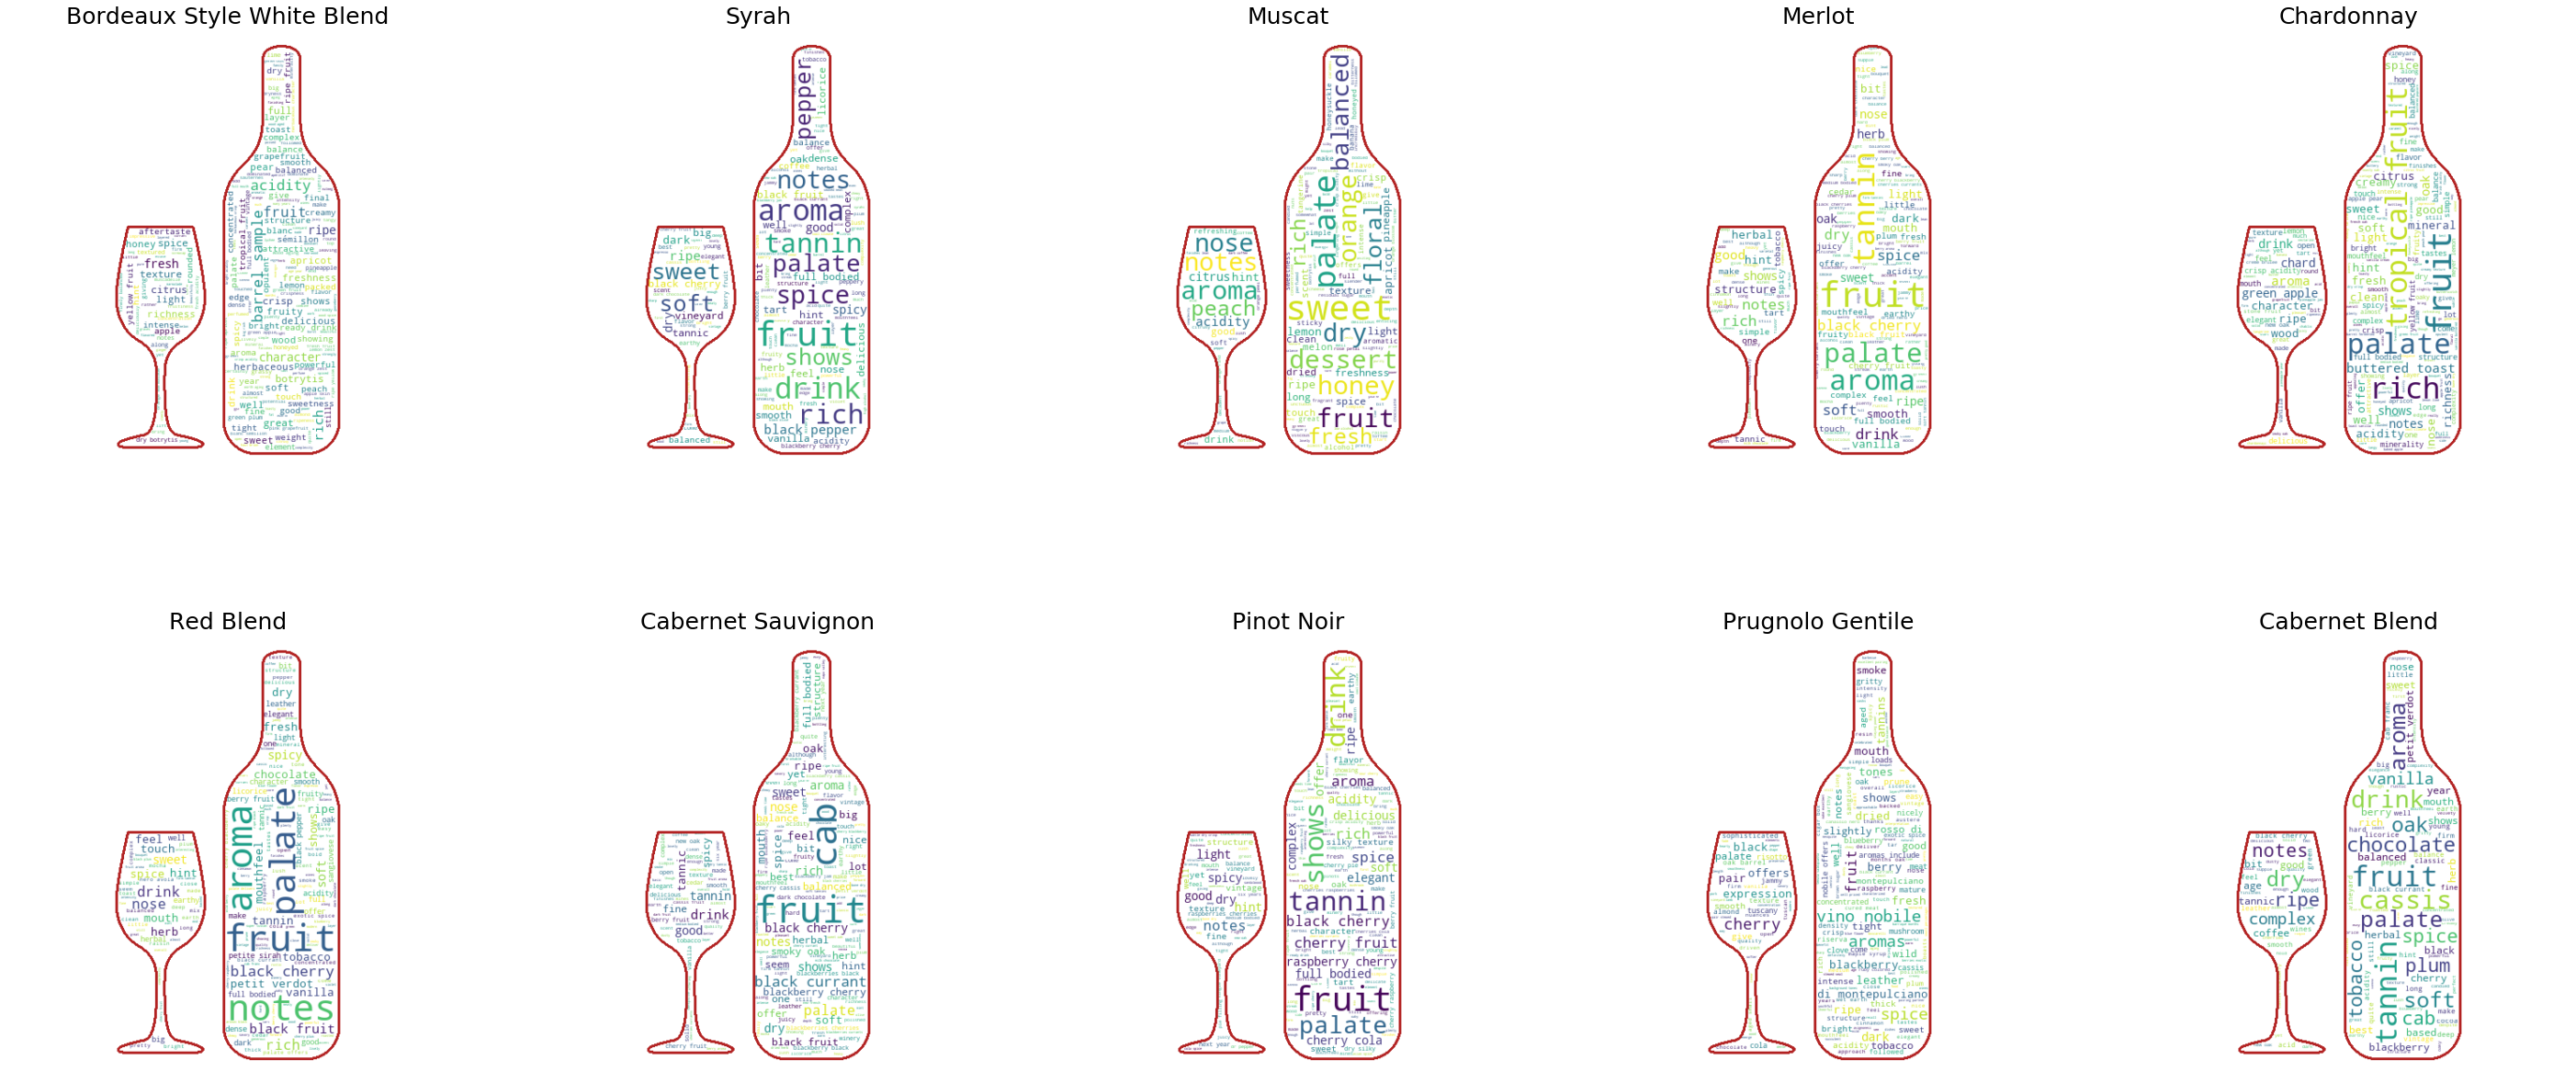

In [58]:
#Plots the word clouds.
plt.figure(figsize=(50, 50))

plt.subplot(2, 5, 1)
plt.title("Bordeaux Style White Blend", fontsize = 25)
plt.imshow(bordeaux_wc, interpolation="bilinear")
plt.axis("off")

plt.subplot(2, 5, 2)
plt.title("Syrah", fontsize = 25)
plt.imshow(syrah_wc, interpolation="bilinear")
plt.axis("off")

plt.subplot(2, 5, 3)
plt.title("Muscat", fontsize = 25)
plt.imshow(muscat_wc, interpolation="bilinear")
plt.axis("off")

plt.subplot(2, 5, 4)
plt.title("Merlot", fontsize = 25)
plt.imshow(merlot_wc, interpolation="bilinear")
plt.axis("off")

plt.subplot(2, 5, 5)
plt.title("Chardonnay", fontsize = 25)
plt.imshow(chardonnay_wc, interpolation="bilinear")
plt.axis("off")

plt.subplot(2, 5, 6)
plt.title("Red Blend", fontsize = 25)
plt.imshow(red_wc, interpolation="bilinear")
plt.axis("off")

plt.subplot(2, 5, 7)
plt.title("Cabernet Sauvignon", fontsize = 25)
plt.imshow(sauvignon_wc, interpolation="bilinear")
plt.axis("off")

plt.subplot(2, 5, 8)
plt.title("Pinot Noir", fontsize = 25)
plt.imshow(pinot_noir_wc, interpolation="bilinear")
plt.axis("off")

plt.subplot(2, 5, 9)
plt.title("Prugnolo Gentile", fontsize = 25)
plt.imshow(prugnolo_wc, interpolation="bilinear")
plt.axis("off")

plt.subplot(2, 5, 10)
plt.title("Cabernet Blend", fontsize = 25)
plt.imshow(blend_wc, interpolation="bilinear")
plt.axis("off")

plt.subplots_adjust(hspace = -0.68)
plt.show()